#### **Finalizing the data preparation before modeling**

Let’s now proceed step by step to finalize the data preparation before modeling.

In [20]:
# Load and Inspect the Cleaned Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/cleaned_fake_job_postings.csv')
df.head()


,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,Not Disclosed,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,unknown,0,1,0,Other,Internship,Bachelor's Degree,Information Technology and Services,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,Not Disclosed,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,Bachelor's Degree,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Sales,Not Disclosed,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,unknown,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,Not Disclosed,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",Sales,Not Disclosed,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


Before building any models, we need to make sure our dataset is fully clean and ready for feature engineering or training. This includes:

Checking for any remaining missing values

Confirming the data types are appropriate (e.g., categorical vs numerical)

Ensuring that the dataset has only the necessary, useful columns

In [21]:
# Confirm Null Handling
df.isnull().sum()

job_id                 0
title                  0
location               0
department             0
salary_range           0
company_profile        0
description            0
requirements           0
benefits               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

If all columns show 0 missing values, our data is fully clean.

Review the data types — ensure numerical values aren’t stored as objects (strings), and categorical variables are correctly labeled.

This step gives us confidence before we move to encoding and feature preparation.

---

### **Encode Categorical Features**

To prepare our data for machine learning models, we must convert categorical (text-based) columns into numeric values. Most machine learning algorithms work only with numbers — not raw text.

We will use two encoding techniques:

**Label Encoding**
- Ideal for columns with a lot of unique values (e.g., `title`, `description`, `company_profile`).
- Converts each unique category into a numeric label.
- Keeps dimensionality low, which avoids performance issues.

**One-Hot Encoding**
- Best for columns with fewer unique categories (e.g., `employment_type`, `required_education`).
- Creates a new column for each category and marks it with 0 or 1.
- Helps the model avoid misunderstanding numeric labels as having a ranked order.

**Why Encoding Matters:**
- It transforms text into a format the model understands.
- Helps the model learn meaningful patterns rather than treating text as gibberish.

We’ll apply:
- **Label encoding** on long-text fields to simplify them.
- **One-hot encoding** on clean categorical columns to preserve category uniqueness


In [22]:
from sklearn.preprocessing import LabelEncoder

# Create a copy of the dataframe to avoid modifying the original
df_encoded = df.copy()

# List of high-cardinality text fields — we’ll use Label Encoding
label_columns = ['title', 'company_profile', 'description', 'requirements', 'benefits', 'location']

# Apply Label Encoding
label_encoder = LabelEncoder()
for column in label_columns:
    if column in df_encoded.columns:
        df_encoded[column] = label_encoder.fit_transform(df_encoded[column].astype(str))

# One-hot encode low-cardinality categorical features
df_encoded = pd.get_dummies(df_encoded, 
                             columns=['employment_type', 'required_experience', 
                                      'required_education', 'industry', 'function',], 
                             drop_first=True)

#  Catching any remaining object-type columns and encode them
non_numeric_cols = df_encoded.select_dtypes(include='object').columns.tolist()
for col in non_numeric_cols:
    df_encoded[col] = label_encoder.fit_transform(df_encoded[col].astype(str))

df_encoded.head()


,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,...,function_Public Relations,function_Purchasing,function_Quality Assurance,function_Research,function_Sales,function_Science,function_Strategy/Planning,function_Supply Chain,function_Training,function_Writing/Editing
0,1,6043,2444,758,872,1526,4506,3829,6017,0,...,0,0,0,0,0,0,0,0,0,0
1,2,2183,1049,1161,872,50,7255,10526,5570,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1763,1806,1054,872,1389,7470,4560,6017,0,...,0,0,0,0,0,0,0,0,0,0
3,4,299,1649,1054,872,975,9590,3166,3334,0,...,0,0,0,0,1,0,0,0,0,0
4,5,975,1687,1054,872,1210,5724,6495,2254,0,...,0,0,0,0,0,0,0,0,0,0


This transformation allows us to feed the data into models like Logistic Regression, Decision Trees, etc., without any preprocessing errors.


In [23]:
# Saving Final Dataset
df_encoded.to_csv('data/final_job_postings_encoded.csv', index=False)

---
### **Train-Test Split**

To evaluate our model’s performance, we split the dataset into training and testing sets:

- The model will learn patterns from the training set 80% of the data.
- We will evaluate accuracy and generalization using the test set 20% of the data.

We used stratified sampling to preserve the original class distribution of fraudulent and legitimate job postings.


In [24]:
from sklearn.model_selection import train_test_split

# Separating features and target
X = df_encoded.drop("fraudulent", axis=1)
y = df_encoded["fraudulent"]

# Identifying any non-numeric columns in X
non_numeric_columns = X.select_dtypes(include='object').columns.tolist()

# Applying Label Encoding to any remaining non-numeric columns
label_encoder = LabelEncoder()
for col in non_numeric_columns:
    X[col] = label_encoder.fit_transform(X[col].astype(str))


# Split into training and test sets into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# checking on the split sizes
print("Training samples:", X_train.shape[0])
print("Test samples:", X_test.shape[0])


Training samples: 14304
Test samples: 3576


### Baseline Model: Logistic Regression

We'll start simple — Logistic Regression is interpretable and with a good baseline.
We chose Logistic Regression as our baseline model because it's:

- Simple to implement
- Fast to train
- Easy to interpret

We trained the model on the training data and evaluated its performance using classification metrics such as:
- Precision
- Recall
- F1-score
- Confusion Matrix


Logistic Regression Report:
[[3401    2]
 [ 161   12]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      3403
           1       0.86      0.07      0.13       173

    accuracy                           0.95      3576
   macro avg       0.91      0.53      0.55      3576
weighted avg       0.95      0.95      0.94      3576



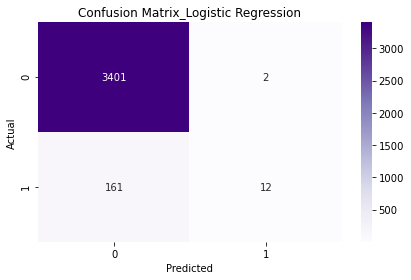

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Initialize the model
log_model = LogisticRegression(max_iter=1000)

# Train the model
log_model.fit(X_train, y_train)

# Make predictions
y_pred = log_model.predict(X_test)

# Evaluate performance
print("Logistic Regression Report:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix_Logistic Regression")
plt.tight_layout()
plt.show()


In [ ]:
X.dtypes

job_id                        int64
title                         int32
location                      int32
department                    int32
salary_range                  int32
                              ...  
function_Science              uint8
function_Strategy/Planning    uint8
function_Supply Chain         uint8
function_Training             uint8
function_Writing/Editing      uint8
Length: 200, dtype: object

In [ ]:
X.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,...,function_Public Relations,function_Purchasing,function_Quality Assurance,function_Research,function_Sales,function_Science,function_Strategy/Planning,function_Supply Chain,function_Training,function_Writing/Editing
0,1,6043,2444,758,872,1526,4506,3829,6017,0,...,0,0,0,0,0,0,0,0,0,0
1,2,2183,1049,1161,872,50,7255,10526,5570,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1763,1806,1054,872,1389,7470,4560,6017,0,...,0,0,0,0,0,0,0,0,0,0
3,4,299,1649,1054,872,975,9590,3166,3334,0,...,0,0,0,0,1,0,0,0,0,0
4,5,975,1687,1054,872,1210,5724,6495,2254,0,...,0,0,0,0,0,0,0,0,0,0


 ### Train a Random Forest Classifier

 Next, we will train a Random Forest model. Random Forest is an ensemble learning method that builds multiple decision trees and combines their results for better accuracy and generalization.

We use it to:
- Improve prediction performance.
- Handle both categorical and numerical data effectively.
- Understand which features are most important in classifying job postings as fraudulent or legitimate.

Let's train the model and evaluate its performance.

Random Forest Report:
[[3401    2]
 [  50  123]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3403
           1       0.98      0.71      0.83       173

    accuracy                           0.99      3576
   macro avg       0.98      0.86      0.91      3576
weighted avg       0.99      0.99      0.98      3576



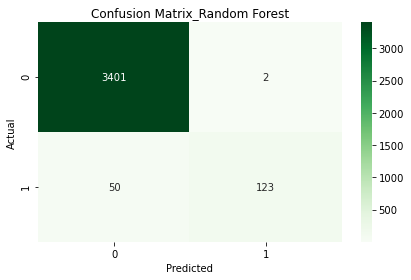

In [38]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
# Predict
y_rf_pred = rf.predict(X_test)

print("Random Forest Report:")
print(confusion_matrix(y_test, y_rf_pred))
print(classification_report(y_test, y_rf_pred))

cm_rf = confusion_matrix(y_test, y_rf_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix_Random Forest")
plt.tight_layout()
plt.show()


The confusion matrix below shows the performance of the Random Forest classifier in terms of true positives, true negatives, false positives, and false negatives. This visualization helps us understand how well the model distinguishes between fraudulent and legitimate job postings.

To understand which model performs better, we'll compare key metrics like precision, recall, and F1-score side by side. This helps identify which model balances identifying fraudulent jobs without misclassifying legitimate ones.


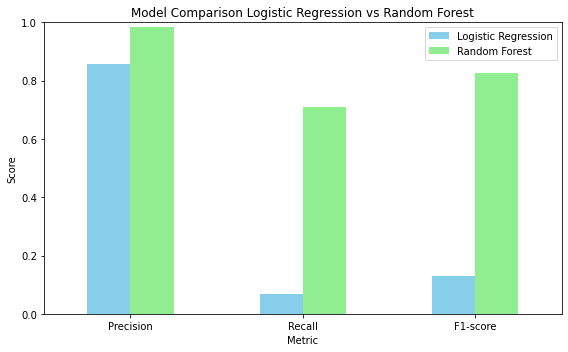

In [41]:
from sklearn.metrics import precision_score, recall_score, f1_score

metrics = ['Precision', 'Recall', 'F1-score']
logreg_scores = [
    precision_score(y_test, y_pred),
    recall_score(y_test, y_pred),
    f1_score(y_test, y_pred)
]
rf_scores = [
    precision_score(y_test, y_rf_pred),
    recall_score(y_test, y_rf_pred),
    f1_score(y_test, y_rf_pred)
]

compare_df = pd.DataFrame({
    'Metric': metrics,
    'Logistic Regression': logreg_scores,
    'Random Forest': rf_scores
})

compare_df.set_index('Metric').plot(kind='bar', figsize=(8, 5), color=['skyblue', 'lightgreen'])
plt.title('Model Comparison Logistic Regression vs Random Forest')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


**Feature Importance from Random Forest**

Random Forest allows us to understand which features contribute most to detecting fraudulent job postings. 
By ranking the top features by importance, we gain insights into what patterns the model relies on, for example, certain keywords, locations, or employment types.

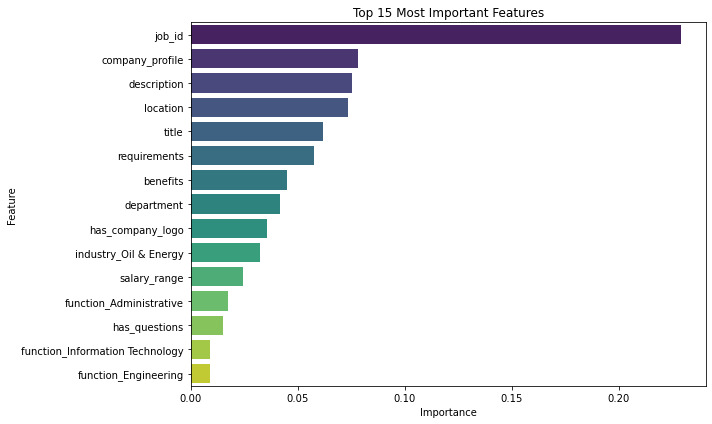

In [40]:
importances = rf.feature_importances_
features = X.columns

# creating a dataframe
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(15)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title("Top 15 Most Important Features")
plt.tight_layout()
plt.show()
